~~~~ This notebook is part of Iraklis Pelegris Master Thesis "Measurment of Atmospheric Neutrino Flux using Km3net/ARCA detector ~~~~

# ----- ARCA/Km3net Detector ------

[ARCA/Km3net](https://www.km3net.org/research/physics/astronomy-with-arca/) detector gathers data using its optical modules.The ouput data file contains information for all interactions and events that were detected during ARCA's operational time. The key point about this file is that the events, which gave the recorded signal, are not labelled and so we are not able to tell which physical processes gave us that signal. 

### Early processing

Early processing steps iclude removing "standard noise" like random detector's electronics noise or signal from radioactive "sea salt" decays like [Potassium's-40](https://en.wikipedia.org/wiki/Potassium-40).

### Monte-Carlo data rebuilding 

After the data file is collected, Monte-Carlo simulations are conducted in order to accurately rebuild the data file. For example we assume that X [atmospheric neutrinos](https://neutrinos.fnal.gov/sources/atmospheric-neutrinos/), Y [Muons](https://www.energy.gov/science/doe-explainsmuons), and Z [Cosmic Neutrinos](https://neutrinos.fnal.gov/sources/cosmic-neutrinos/) of every flavor should have passed through our detector during its running time. This hypothesis comes with accurate predictions on each one of the particle's characteristics. Some of these characteristisc are its energy (later denoted as logTrueEn), the energy that the detector most likely would have assigned to the particle if the particle was detected (logRecoEn) and many more.

# ------ Importing Monte-Carlo files ------

We will start conducting our analysis by importing a file that discribes neutrinos that were detected and one that describes muons. The imported files are .root files and contain one or more [TTrees](https://root.cern.ch/doc/master/classTTree.html) (TTrees are dataframe-like obdjects) that hold the information we need. For this purpose we will use [uproot library](https://pypi.org/project/uproot/). We will start by uploading the file that holds information about neutrinos.

In [1]:
import uproot

# Reading using uproot.open and finding what I'm looking for
ProcessedEvents_forBDT_a_nu_mu_CC = uproot.open("forBDT_a-nu_Mu_CC_All_ARCA21_v8.1_2RecoCut_bdt_branch.root")
ProcessedEvents_forBDT_a_nu_mu_CC.classnames()

{'ProcessedEvents_forBDT;53': 'TTree', 'ProcessedEvents_forBDT;52': 'TTree'}

We can see that two TTrees were obtained. The greater the number that accompanies it is, the more recent and updated the TTree is. So, from now on we will always pick the TTree that has the greater number assigned to it. Now lets see what 'ProcessedEvents_forBDT;53' TTree consists of.

In [2]:
ProcessedEvents_forBDT53 = uproot.open("forBDT_a-nu_Mu_CC_All_ARCA21_v8.1_2RecoCut_bdt_branch.root:ProcessedEvents_forBDT;53")
ProcessedEvents_forBDT53.keys()

['pseudo_runid',
 'run_subNumber',
 'pseudo_subRunid',
 'pseudo_livetime',
 'evt_id',
 'evt_num',
 'evt_overlays',
 'reco_type',
 'jbeta0',
 'jbeta0_deg',
 'D',
 'D3d',
 'cos_zen',
 'fi',
 'R',
 'mean_tres_it',
 'zenith',
 'logEreco',
 'Ereco',
 'E_nu',
 'logEreco2',
 'logbeta0',
 'jlik',
 'GNhit',
 'Snpe',
 'SnpeT',
 'Slen',
 'Elen',
 'best_trk_pos_x',
 'best_trk_pos_y',
 'best_trk_pos_z',
 'best_trk_dir_x',
 'best_trk_dir_y',
 'best_trk_dir_z',
 'Q1',
 'Q1new',
 'diffangle',
 'delta_zenith',
 'mu_pos_x',
 'mu_pos_y',
 'mu_pos_z',
 'nu_pos_x',
 'nu_pos_y',
 'nu_pos_z',
 'cos_zen_mu',
 'zenith_mu',
 'logE_mu',
 'logE_nu',
 'logEbundle',
 'logEdepos',
 'bjorken_y',
 'cos_zen_nu',
 'zenith_nu',
 'w3atm',
 'w3iceHESE',
 'w3loi',
 'w3random',
 'w3ice',
 'w3antares',
 'w1',
 'neutrino_type',
 'Ntrack_all',
 'Nallbehind',
 'Nallbehind2',
 'Nallbehind3',
 'NtrackIT10',
 'NtrackIT30',
 'NtrackIT',
 'NtrackEarly',
 'NtrackLate',
 'TrLengthIT',
 'TrLengthIT_2',
 'TrLengthIT_3',
 'ratio130',
 'ra

All the above keys represent characteristics that describe each neutrino. You can also see that logTrueEn and logRecoEn that were described before are present in the above list. Now we will extract some of these variables as numpy arrays to conduct further analysis. The extracted variables are:

- TrueEn: True energy that each particle has (measured in GeV).
- logTrueEn: The power of ten that represents the TrueEn when written in exponential form.
- RecoEn: The energy that the detector assigned to each particle according to its measuring capabilities.
- logRecoEn: The power of ten that represents the RecoEn when written in exponential form.
- bdt_score: Earlier processing involved classifying each particle according to its characteristics. So, a [TMVA Boosted Decision Tree (BDT)](https://root.cern.ch/doc/master/classTMVA_1_1MethodBDT.html) was used to attribute a BDT score to each event. The classifier was trained to recognise neutrinos as signals and muons as backround. BDT scores ranges from -1 to +1. A BDT score of -1 means that the particle is certainly part of the backround (and thus a muon) and a BDT score of +1 is certainly a neutrino.

In [3]:
import numpy as np

# Exctracting as np arrays
bdt_score_numuCC = ProcessedEvents_forBDT53['bdt_score'].array(library="np")

cosmic = ProcessedEvents_forBDT53['w3ice'].array(library="np")
atm = ProcessedEvents_forBDT53['w3atm'].array(library="np")

RecoEn_numuCC = ProcessedEvents_forBDT53['Ereco'].array(library="np")
logRecoEn_numuCC  = ProcessedEvents_forBDT53['logEreco'].array(library="np")

TrueEn_numuCC  = ProcessedEvents_forBDT53['E_nu'].array(library="np")
logTrueEn_numuCC  = ProcessedEvents_forBDT53['logE_nu'].array(library="np")

# _nu_mu_CC stands for NeUtrino of MUon flavor produced via Charged Current process

In the above snipset w3ice and w3atm variables were also obtained. That is because neutrinos are very weakly interacting with ordinary matter and thus are not easily detected. So, when producing the Monte-Carlo simulations, we assume that a very large number of neutrinos pass through our detector. Very few of the are eventually detected. W3ice represents the propabily of a cosmic neutrino of given characteristics to be found by our detector according to a given Cosmic Neutrino Flux. The same goes for w3atm but for Atmospheric Neutrinos. Finally, when building Monte-Carlo files, we assume that the detector is working 24/7 all year round. This is not true since the detectors undergoes many tests and updates limmiting its running time to only a few months per year. So, besides talking into account the previously mentioned weighting of each event we also have to rescale our data to the real running time of the detector. In this Notebook, we use data from ARCA-19 phase so we insert the corresponding given parameters for time scalling:

In [4]:
scale_to_live_muons_arca21 = 5825876.1 / 9817299.000
scale_to_live_neutrinos_arca21 = 5825876.1

We continue by doing the same but for muons file.

In [5]:
ProcessedEvents_forBDT_muons = uproot.open("forBDT_muons_All_ARCA21_v8.1_2RecoCut_bdt_branch.root:ProcessedEvents_forBDT")
ProcessedEvents_forBDT_muons.keys()

['pseudo_runid',
 'run_subNumber',
 'pseudo_subRunid',
 'pseudo_livetime',
 'evt_id',
 'evt_num',
 'evt_overlays',
 'reco_type',
 'jbeta0',
 'jbeta0_deg',
 'D',
 'D3d',
 'cos_zen',
 'fi',
 'R',
 'mean_tres_it',
 'zenith',
 'logEreco',
 'Ereco',
 'E_nu',
 'logEreco2',
 'logbeta0',
 'jlik',
 'GNhit',
 'Snpe',
 'SnpeT',
 'Slen',
 'Elen',
 'best_trk_pos_x',
 'best_trk_pos_y',
 'best_trk_pos_z',
 'best_trk_dir_x',
 'best_trk_dir_y',
 'best_trk_dir_z',
 'Q1',
 'Q1new',
 'diffangle',
 'delta_zenith',
 'mu_pos_x',
 'mu_pos_y',
 'mu_pos_z',
 'nu_pos_x',
 'nu_pos_y',
 'nu_pos_z',
 'cos_zen_mu',
 'zenith_mu',
 'logE_mu',
 'logE_nu',
 'logEbundle',
 'logEdepos',
 'bjorken_y',
 'cos_zen_nu',
 'zenith_nu',
 'w3atm',
 'w3iceHESE',
 'w3loi',
 'w3random',
 'w3ice',
 'w3antares',
 'w1',
 'neutrino_type',
 'Ntrack_all',
 'Nallbehind',
 'Nallbehind2',
 'Nallbehind3',
 'NtrackIT10',
 'NtrackIT30',
 'NtrackIT',
 'NtrackEarly',
 'NtrackLate',
 'TrLengthIT',
 'TrLengthIT_2',
 'TrLengthIT_3',
 'ratio130',
 'ra

In [6]:
bdt_score_muons = ProcessedEvents_forBDT_muons['bdt_score'].array(library="np")

# ----- Efficiency -----

Lets start by cheking how many Cosmic Neutrinos, Atmospheric Neutrinos and Muons we have in our sample.

In [7]:
muons = 0

for i in range(len(bdt_score_muons)):
    
    muons += 1 * scale_to_live_muons_arca21 

In [8]:
atm_neutrinos = 0
cosmic_neutrinos = 0 

for i in range(len(bdt_score_numuCC)):
    
    atm_neutrinos += 1 * scale_to_live_neutrinos_arca21 * atm[i]
    cosmic_neutrinos += 1 * scale_to_live_neutrinos_arca21 * cosmic[i]

In [9]:
print(f"We have {atm_neutrinos} Atmospheric Neutrinos, {muons} Muons and {cosmic_neutrinos} Cosmic Neutrinos.")

We have 631.6762803190627 Atmospheric Neutrinos, 5416.2322207670795 Muons and 5.53913870607804 Cosmic Neutrinos.


We want to create a sample that consist mostly of atmospheric neutrinos in order to study them. For this perpuse we can define a Signal/Noise ratio. For us, Signal will be the Atmospheric neutrinos and Noise will be everything else.

In [10]:
signal_over_backround = atm_neutrinos / ( cosmic_neutrinos + muons )

print(f"Signal/Noise is: {signal_over_backround}.")

Signal/Noise is: 0.11650736234300439.


This ratio is not something that we can work with. We expected this outcome because, as we saw earlier, muons are ~ 5500 whereas Atmospheric Neutrinos are ~ 650. A way to obtain a purrer sample is to imply a BDT Score Cut. We said previously that all events are assigned a BDT Score and that the classifier assigns mostly negative scores to muons and mostly positives to neutrinos. This offcorse doent mean that our classifier is unmistacable.

We will now define Efficiency measure. Efficiency describes the percentage of the initial particle population that will still remain in our sample after we impliment a BDT Cut, which translates to, after we throw events with a smaller BDT Score than the selected one.

In [11]:
#Defining bin edges and number of bins
bdt_score_bin_edges = np.arange(-1, 1.05, 0.05)
number_of_bins = len(bdt_score_bin_edges)

#Initializing arrays to store the counts of each bin
atm_sum_per_cut = np.zeros(number_of_bins, dtype=float)
cosmic_sum_per_cut = np.zeros(number_of_bins, dtype=float)

#Iterating over the bins and count the elements in each bin
for i in range(number_of_bins):
    
    inspected_cut = bdt_score_bin_edges[i]
    for j in range(len(bdt_score_numuCC)):
        
        if bdt_score_numuCC[j]>inspected_cut:
            
            atm_sum_per_cut[i] += 1 * scale_to_live_neutrinos_arca21 * atm[j]
            cosmic_sum_per_cut[i] += 1 * scale_to_live_neutrinos_arca21 * cosmic[j]

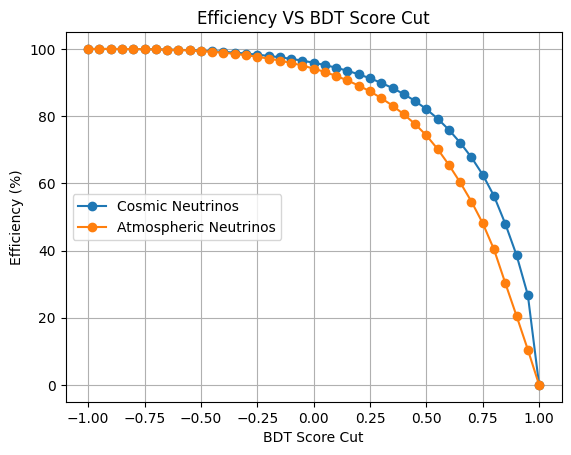

In [12]:
import matplotlib.pyplot as plt

#Efficiency for cosmic and atmo neutrinos
Efficiency_cosmic = 100 * cosmic_sum_per_cut / cosmic_neutrinos
Efficiency_atm = 100 * atm_sum_per_cut / atm_neutrinos

#...Drawing efficiency vs BDT Score cut for cosmic and atm neutrinos
plt.plot(bdt_score_bin_edges, Efficiency_cosmic, marker='o', linestyle='-',label='Cosmic Neutrinos')
plt.plot(bdt_score_bin_edges, Efficiency_atm, marker='o', linestyle='-', label='Atmospheric Neutrinos')

# Adding labels, title and more...
plt.xlabel('BDT Score Cut')
plt.ylabel('Efficiency (%)')
plt.title('Efficiency VS BDT Score Cut')
plt.grid()
plt.legend(loc="center left")

# ...the plot
plt.show()

We continue by doing the same but for muons:

In [16]:
#Initializing arrays to store the counts of each bin
muons_per_cut = np.zeros(number_of_bins, dtype=float)

#Iterating over the bins and count the elements in each bin
for i in range(number_of_bins):
    
    inspected_cut = bdt_score_bin_edges[i]
    for j in range(len(bdt_score_muons)):
        
        if bdt_score_muons[j]>inspected_cut:
            
            muons_per_cut[i] += 1 * scale_to_live_muons_arca21 

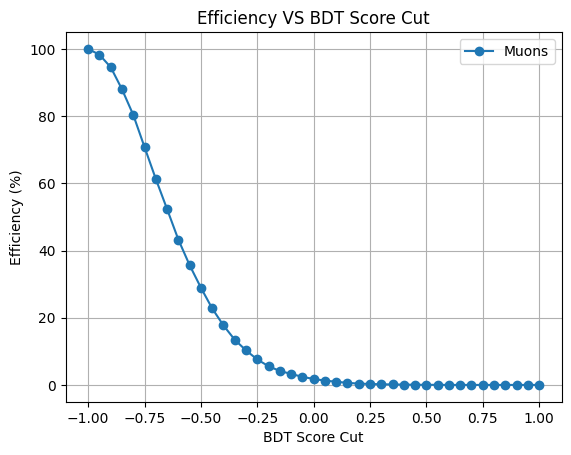

In [18]:
#Efficiency for cosmic and atmo neutrinos
Efficiency_muons = 100 * muons_per_cut / muons

#...Drawing efficiency vs BDT Score cut for cosmic and atm neutrinos
plt.plot(bdt_score_bin_edges, Efficiency_muons, marker='o', linestyle='-',label='Muons')

# Adding labels, title and more...
plt.xlabel('BDT Score Cut')
plt.ylabel('Efficiency (%)')
plt.title('Efficiency VS BDT Score Cut')
plt.grid()
plt.legend(loc="best")

# ...the plot
plt.show()

Now let's see all of them in one plot:

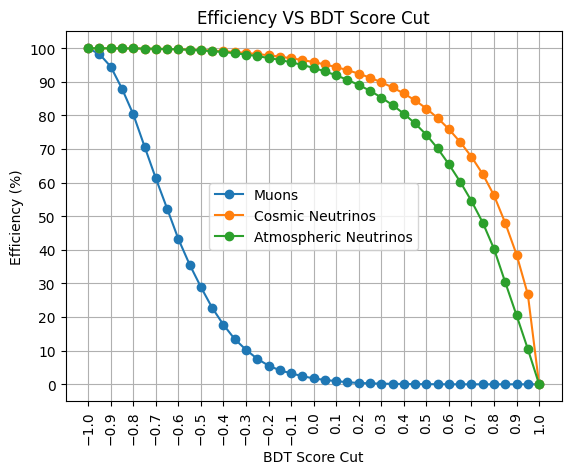

In [32]:
## import matplotlib.pyplot as plt

#Efficiency for cosmic and atmo neutrinos
Efficiency_cosmic = 100 * cosmic_sum_per_cut / cosmic_neutrinos
Efficiency_atm = 100 * atm_sum_per_cut / atm_neutrinos

#...Drawing efficiency vs BDT Score cut for cosmic and atm neutrinos
plt.plot(bdt_score_bin_edges, Efficiency_muons, marker='o', linestyle='-',label='Muons')
plt.plot(bdt_score_bin_edges, Efficiency_cosmic, marker='o', linestyle='-',label='Cosmic Neutrinos')
plt.plot(bdt_score_bin_edges, Efficiency_atm, marker='o', linestyle='-', label='Atmospheric Neutrinos')

# Adding labels, title and more...
plt.xlabel('BDT Score Cut')
plt.ylabel('Efficiency (%)')
plt.title('Efficiency VS BDT Score Cut')
plt.grid()
plt.legend(loc="best")
plt.yticks(np.linspace(0 ,100, 11))
plt.xticks(np.linspace(-1 , 1, 21),rotation="vertical")

# ...the plot
plt.show()

By examining the above plot we assume that, by implying a strict BDT Cut at 0.4, 80% of initial Atmospheric Neutrinos, ~ 86% of initial Cosmic Neutrinos and <<< 1% of initial Muons samples will remain. We will no imply the BDT Cut and then examine our new Signal/Noise ratio.

# ----- BDT Cut -----

In [33]:
inspected_bdt_cut = 0.4

In [34]:
print("Value of inspected BDT Score cut is: ",inspected_bdt_cut )

Value of inspected BDT Score cut is:  0.4


In [35]:
%%time

# Initializing
Cutted_bdt_score_numuCC = []
Cutted_cosmic = []
Cutted_atm = []

Cutted_bdt_score_muons = []

# CutCutCut
for i in range(len(bdt_score_numuCC)):
    
    if (bdt_score_numuCC[i] > inspected_bdt_cut):
        
        Cutted_bdt_score_numuCC.append(bdt_score_numuCC[i])
        
        Cutted_cosmic.append(cosmic[i])
        Cutted_atm.append(atm[i])
        
       
for i in range(len(bdt_score_muons)-1):
    if bdt_score_muons[i] > inspected_bdt_cut:
        
        Cutted_bdt_score_muons.append(bdt_score_muons[i])
        
# Normaly, we would have to insert all variables here but for the purpose of this analysis this is not necassery

CPU times: user 6.06 s, sys: 156 ms, total: 6.21 s
Wall time: 6.21 s


Now lets see let's examine precisely how many particles we were left with after the BDT Cut and the Signal/Noise ratio.

In [36]:
muons_after_bdt_cut  = 0
for i in range(len(Cutted_bdt_score_muons)):
    
    muons_after_bdt_cut  += 1 * scale_to_live_muons_arca21 
    
    
atm_neutrinos_after_bdt_cut = 0
cosmic_neutrinos_after_bdt_cut  = 0 
for i in range(len(Cutted_bdt_score_numuCC)):
    
    atm_neutrinos_after_bdt_cut += 1 * scale_to_live_neutrinos_arca21 * Cutted_atm[i]
    cosmic_neutrinos_after_bdt_cut += 1 * scale_to_live_neutrinos_arca21 * Cutted_cosmic[i]
    
signal_over_backround_after_bdt_cut = atm_neutrinos_after_bdt_cut / ( cosmic_neutrinos_after_bdt_cut + muons_after_bdt_cut )

print(f"Signal/Noise after BDT Cut is: {signal_over_backround_after_bdt_cut}.\nRemaining Muons after BDT Cut: {muons_after_bdt_cut}.")

Signal/Noise after BDT Cut is: 50.18774482183255.
Remaining Muons after BDT Cut: 5.340866657926992.


As we can see, Muons background which originally included ~ 5400 particles, now contains only ~ 5 resulting in a very bigger Signal/Noise ratio of about 50.